In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

filepath1 = "cleaned_data.csv"
filepath2 = "df_num.csv"
df1 = pd.read_csv(filepath1)
df2 = pd.read_csv(filepath2)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           726 non-null    float64
 1   Hours per day                 726 non-null    float64
 2   While working                 724 non-null    object 
 3   Fav genre                     726 non-null    object 
 4   BPM                           623 non-null    float64
 5   Frequency [Classical]         726 non-null    object 
 6   Frequency [Country]           726 non-null    object 
 7   Frequency [EDM]               726 non-null    object 
 8   Frequency [Folk]              726 non-null    object 
 9   Frequency [Gospel]            726 non-null    object 
 10  Frequency [Hip hop]           726 non-null    object 
 11  Frequency [Jazz]              726 non-null    object 
 12  Frequency [K pop]             726 non-null    object 
 13  Frequ

In [84]:
df1

,Age,Hours per day,While working,Fav genre,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,4.0,No,Video game music,132.0,Never,Never,Very frequently,Never,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
1,61.0,2.5,Yes,Jazz,84.0,Sometimes,Never,Never,Rarely,Sometimes,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
2,18.0,4.0,Yes,R&B,107.0,Never,Never,Rarely,Never,Rarely,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
3,18.0,5.0,Yes,Jazz,86.0,Rarely,Sometimes,Never,Never,Never,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
4,18.0,3.0,Yes,Video game music,66.0,Sometimes,Never,Rarely,Sometimes,Rarely,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,17.0,2.0,Yes,Rock,120.0,Very frequently,Rarely,Never,Sometimes,Never,...,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve
722,18.0,1.0,Yes,Pop,160.0,Rarely,Rarely,Never,Never,Never,...,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve
723,19.0,6.0,Yes,Rap,120.0,Rarely,Sometimes,Sometimes,Rarely,Rarely,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve
724,19.0,5.0,Yes,Classical,170.0,Very frequently,Never,Never,Never,Never,...,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve


In [85]:
# Q3: Does the frequency of listening to different genres correlate with different 
# mental health disorders?

In [86]:
# Heatmap of BPM vs disorder quantity

In [87]:
df1.columns

Index(['Age', 'Hours per day', 'While working', 'Fav genre', 'BPM',
       'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]',
       'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]',
       'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]',
       'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
       'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]',
       'Frequency [Video game music]', 'Anxiety', 'Depression', 'Insomnia',
       'OCD', 'Music effects'],
      dtype='object')

In [95]:
freq_cols = ["BPM", "Frequency [Classical]", "Frequency [Country]", "Frequency [EDM]", "Frequency [Folk]", "Frequency [Gospel]",
        "Frequency [Hip hop]", "Frequency [Jazz]", "Frequency [K pop]", "Frequency [Latin]", "Frequency [Lofi]", "Frequency [Metal]",
        "Frequency [Pop]", "Frequency [R&B]", "Frequency [Rap]", "Frequency [Rock]", "Frequency [Video game music]", "Anxiety", 
        "Depression", "Insomnia", "OCD"]

In [96]:
df_pies = df2[freq_cols]
df_pies = df_pies.sort_values(by="BPM", ascending=False).dropna(subset="BPM")
df_pies = df_pies.loc[df_pies["BPM"] > 0]

df_pies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 620 entries, 634 to 423
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BPM                           620 non-null    float64
 1   Frequency [Classical]         620 non-null    int64  
 2   Frequency [Country]           620 non-null    int64  
 3   Frequency [EDM]               620 non-null    int64  
 4   Frequency [Folk]              620 non-null    int64  
 5   Frequency [Gospel]            620 non-null    int64  
 6   Frequency [Hip hop]           620 non-null    int64  
 7   Frequency [Jazz]              620 non-null    int64  
 8   Frequency [K pop]             620 non-null    int64  
 9   Frequency [Latin]             620 non-null    int64  
 10  Frequency [Lofi]              620 non-null    int64  
 11  Frequency [Metal]             620 non-null    int64  
 12  Frequency [Pop]               620 non-null    int64  
 13  Frequenc

In [97]:
bins = [0, 100, 120, 150, 200, 300, 630]
groups = ["<100", "100-119", "120-149", "150-199", "200-299", ">300"]
df_pies["BPM_groups"] = pd.cut(df_pies["BPM"], bins, labels=groups, include_lowest=True)
df_pies.head()

,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,BPM_groups
634,624.0,2,0,3,0,0,0,0,1,0,...,0,0,0,0,2,4.0,7.0,1.0,3.0,>300
600,220.0,1,0,0,0,0,0,0,0,0,...,0,0,1,3,0,3.0,3.0,1.0,8.0,200-299
243,220.0,1,0,0,0,0,0,1,0,0,...,0,0,1,2,1,0.0,0.0,0.0,1.0,200-299
652,218.0,2,2,2,2,0,1,0,3,1,...,1,1,2,3,1,6.0,8.0,7.0,0.0,200-299
555,210.0,0,0,0,1,0,2,3,0,1,...,1,2,2,2,1,9.0,6.0,8.0,5.0,200-299


In [98]:
df_heat_rock = df_pies.groupby("BPM_groups")["Frequency [Rock]"].mean().reset_index()

# df_heat_rock = df_heat_rock.set_index("BPM_groups")
df_heat_rock.head()

C:\Users\redra\AppData\Local\Temp\ipykernel_28408\1370467202.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_heat_rock = df_pies.groupby("BPM_groups")["Frequency [Rock]"].mean().reset_index()


,BPM_groups,Frequency [Rock]
0,<100,1.901840
1,100-119,2.012346
2,120-149,2.192308
3,150-199,2.171429
4,200-299,2.571429


In [81]:
# Can only show heatmap of BPM and one column

# sns.heatmap(df_heat_rock, cmap="coolwarm")
# plt.title("BPM vs Frequency of Genre")
# plt.show

In [ ]:
# Scatter plot of genre vs frequency of disorder

In [99]:
anxiety_df = df_pies.loc[df_pies.Anxiety >= 7.0].reset_index(drop=True)
anxiety_df

,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,BPM_groups
0,210.0,0,0,0,1,0,2,3,0,1,...,1,2,2,2,1,9.0,6.0,8.0,5.0,200-299
1,210.0,0,0,3,0,0,1,0,0,0,...,1,0,1,3,2,8.0,6.0,7.0,0.0,200-299
2,208.0,0,0,0,0,0,1,0,1,0,...,3,0,3,3,3,7.0,6.0,3.0,1.0,200-299
3,200.0,1,0,0,1,0,0,3,0,1,...,0,2,0,3,2,7.0,2.0,3.0,1.0,150-199
4,200.0,0,0,2,1,0,2,3,1,0,...,1,2,1,0,0,9.0,4.0,4.0,4.0,150-199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,60.0,1,0,2,3,0,3,2,1,1,...,3,3,2,3,1,7.0,2.0,0.0,7.0,<100
300,60.0,3,0,0,1,1,0,0,0,2,...,0,0,0,0,3,8.0,4.0,3.0,3.0,<100
301,55.0,3,1,0,1,1,0,2,0,0,...,0,0,0,2,2,8.0,8.0,9.0,3.0,<100
302,20.0,1,0,1,0,1,3,1,3,2,...,2,3,3,0,0,10.0,7.0,2.0,0.0,<100


In [60]:
anxiety_df["Fav genre"].value_counts()

Fav genre
Rock                105
Pop                  54
Metal                41
Classical            22
Video game music     18
Hip hop              18
Folk                 18
EDM                  15
R&B                  13
Country              13
K pop                13
Jazz                 10
Rap                   9
Lofi                  6
Gospel                1
Latin                 1
Name: count, dtype: int64

In [61]:
anxiety_top = {"Rock": 106, "Pop": 54, "Metal": 41}
anxiety_total = sum(anxiety_top.values())
anxiety_perc = {key: (value / anxiety_total) * 100 for key, value in anxiety_top.items()}
anxiety_perc

{'Rock': 52.736318407960205,
 'Pop': 26.865671641791046,
 'Metal': 20.398009950248756}

<function matplotlib.pyplot.show(close=None, block=None)>

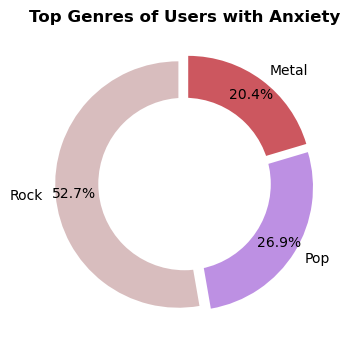

In [62]:
# Donut chart
colors = ("#D8BDBE", "#BD90E3", "#CC575F")

explode = [0.05, 0.05, 0.05]

plt.figure(figsize=(6, 4))

plt.pie(anxiety_perc.values(), explode=explode, labels=anxiety_perc.keys(), colors=colors, autopct="%1.1f%%", 
        shadow=False, startangle=90, pctdistance=0.85)

center_circle = plt.Circle((0, 0), 0.70, fc="white")
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title("Top Genres of Users with Anxiety", fontweight="bold", fontsize=12)
plt.axis=("equal")

plt.show

In [63]:
anxiety_df["BPM"].value_counts()

BPM
120.0    17
140.0    15
150.0    11
80.0      8
110.0     8
         ..
189.0     1
20.0      1
167.0     1
143.0     1
168.0     1
Name: count, Length: 104, dtype: int64

In [100]:
depression_df = df_pies.loc[df_pies.Depression >= 7.0].reset_index(drop=True)
depression_df

,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,BPM_groups
0,624.0,2,0,3,0,0,0,0,1,0,...,0,0,0,0,2,4.0,7.0,1.0,3.0,>300
1,218.0,2,2,2,2,0,1,0,3,1,...,1,1,2,3,1,6.0,8.0,7.0,0.0,200-299
2,200.0,1,1,0,1,0,1,1,0,0,...,2,0,1,3,0,8.0,9.0,6.0,2.0,150-199
3,194.0,1,2,1,1,0,2,2,1,0,...,2,1,1,3,2,6.0,8.0,1.0,6.0,150-199
4,194.0,0,1,2,2,0,2,1,1,1,...,3,2,2,3,2,8.0,8.0,3.0,0.0,150-199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,66.0,1,1,0,3,0,2,2,0,0,...,3,3,2,3,0,10.0,7.0,0.0,10.0,<100
214,63.0,0,1,2,3,0,1,1,0,2,...,1,1,1,3,2,8.0,7.0,7.0,3.0,<100
215,55.0,3,1,0,1,1,0,2,0,0,...,0,0,0,2,2,8.0,8.0,9.0,3.0,<100
216,20.0,1,0,1,0,1,3,1,3,2,...,2,3,3,0,0,10.0,7.0,2.0,0.0,<100


In [103]:
depression_df["Depression"].value_counts()

Depression
7.0     82
8.0     65
10.0    39
9.0     32
Name: count, dtype: int64

In [112]:
dep_rank = {7: 82, 8: 65, 9: 32, 10: 39}
dep_rank_tot = sum(dep_rank.values())
dep_perc_2 = {key: (value / dep_rank_tot) * 100 for key, value in dep_rank.items()}
dep_perc_2

{7: 37.61467889908257,
 8: 29.81651376146789,
 9: 14.678899082568808,
 10: 17.889908256880734}

In [66]:
depression_df["Fav genre"].value_counts()

Fav genre
Rock                78
Metal               33
Pop                 30
Hip hop             19
Classical           15
EDM                 15
Folk                12
Video game music     9
Jazz                 8
K pop                8
Country              7
R&B                  7
Lofi                 6
Rap                  5
Gospel               1
Name: count, dtype: int64

In [67]:
depression_top = {"Rock": 78, "Pop": 33, "Metal": 30}
depression_total = sum(depression_top.values())
depression_perc = {key: (value / depression_total) * 100 for key, value in depression_top.items()}
depression_perc

{'Rock': 55.319148936170215,
 'Pop': 23.404255319148938,
 'Metal': 21.27659574468085}

<function matplotlib.pyplot.show(close=None, block=None)>

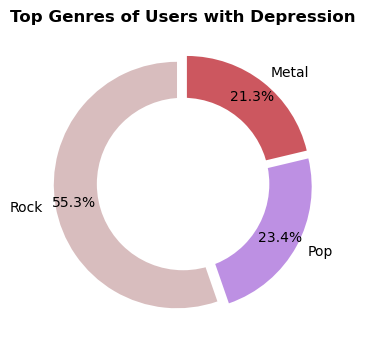

In [68]:
# Donut chart
colors = ("#D8BDBE", "#BD90E3", "#CC575F")

explode = [0.05, 0.05, 0.05]

plt.figure(figsize=(6, 4))

plt.pie(depression_perc.values(), explode=explode, labels=depression_perc.keys(), colors=colors, autopct="%1.1f%%", 
        shadow=False, startangle=90, pctdistance=0.85)

center_circle = plt.Circle((0, 0), 0.70, fc="white")
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title("Top Genres of Users with Depression", fontweight="bold", fontsize=12)
plt.axis=("equal")

plt.show

In [69]:
depression_df["BPM"].value_counts()

BPM
120.0    17
150.0    12
140.0    12
90.0      6
130.0     5
         ..
147.0     1
20.0      1
114.0     1
146.0     1
163.0     1
Name: count, Length: 89, dtype: int64

In [101]:
insomnia_df = df_pies.loc[df_pies.Insomnia >= 7.0].reset_index(drop=True)
insomnia_df

,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,BPM_groups
0,218.0,2,2,2,2,0,1,0,3,1,...,1,1,2,3,1,6.0,8.0,7.0,0.0,200-299
1,210.0,0,0,0,1,0,2,3,0,1,...,1,2,2,2,1,9.0,6.0,8.0,5.0,200-299
2,210.0,0,0,3,0,0,1,0,0,0,...,1,0,1,3,2,8.0,6.0,7.0,0.0,200-299
3,200.0,2,1,0,0,0,1,2,0,0,...,1,0,1,3,2,7.0,4.0,7.0,0.0,150-199
4,190.0,1,0,1,0,0,2,0,0,0,...,1,0,2,3,2,6.0,9.0,9.0,0.0,150-199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,70.0,1,0,1,2,0,0,0,0,3,...,2,0,0,3,3,8.0,3.0,9.0,2.0,<100
147,68.0,3,0,0,0,0,0,1,0,0,...,1,0,0,1,0,4.0,8.0,9.0,1.0,<100
148,63.0,0,1,2,3,0,1,1,0,2,...,1,1,1,3,2,8.0,7.0,7.0,3.0,<100
149,55.0,3,1,0,1,1,0,2,0,0,...,0,0,0,2,2,8.0,8.0,9.0,3.0,<100


In [71]:
insomnia_df["Fav genre"].value_counts()

Fav genre
Rock                45
Metal               31
Pop                 17
Video game music    12
Classical           11
EDM                 10
Jazz                 7
Folk                 7
Hip hop              6
K pop                5
R&B                  5
Lofi                 4
Gospel               3
Country              2
Rap                  2
Latin                1
Name: count, dtype: int64

In [72]:
insomnia_top = {"Rock": 45, "Pop": 17, "Metal": 31}
insomnia_total = sum(insomnia_top.values())
insomnia_perc = {key: (value / insomnia_total) * 100 for key, value in insomnia_top.items()}
insomnia_perc

{'Rock': 48.38709677419355,
 'Pop': 18.27956989247312,
 'Metal': 33.33333333333333}

<function matplotlib.pyplot.show(close=None, block=None)>

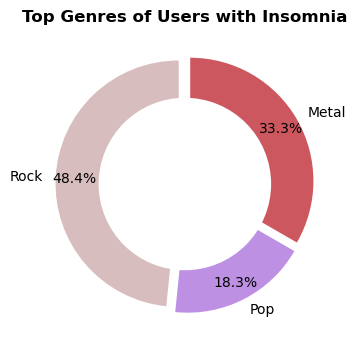

In [73]:
# Donut chart
colors = ("#D8BDBE", "#BD90E3", "#CC575F")

explode = [0.05, 0.05, 0.05]

plt.figure(figsize=(6, 4))

plt.pie(insomnia_perc.values(), explode=explode, labels=insomnia_perc.keys(), colors=colors, autopct="%1.1f%%", 
        shadow=False, startangle=90, pctdistance=0.85)

center_circle = plt.Circle((0, 0), 0.70, fc="white")
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title("Top Genres of Users with Insomnia", fontweight="bold", fontsize=12)
plt.axis=("equal")

plt.show

In [74]:
insomnia_df["BPM"].value_counts()

BPM
120.0    11
140.0     6
130.0     6
148.0     5
150.0     5
         ..
87.0      1
157.0     1
158.0     1
80.0      1
99.0      1
Name: count, Length: 76, dtype: int64

In [102]:
ocd_df = df_pies.loc[df_pies.OCD >= 7.0].reset_index(drop=True)
ocd_df

,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,BPM_groups
0,220.0,1,0,0,0,0,0,0,0,0,...,0,0,1,3,0,3.0,3.0,1.0,8.0,200-299
1,180.0,2,0,2,3,0,0,0,1,0,...,1,0,0,3,3,9.0,5.0,0.0,7.0,150-199
2,178.0,1,2,2,1,0,3,0,0,3,...,3,1,3,2,1,8.0,5.0,3.0,8.0,150-199
3,174.0,2,0,3,0,0,2,0,2,0,...,2,0,0,2,2,9.0,7.0,5.0,7.0,150-199
4,174.0,1,3,2,1,1,1,1,1,1,...,1,1,1,1,1,7.0,6.0,7.0,9.0,150-199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,84.0,1,1,0,1,2,2,2,0,1,...,0,2,1,3,2,10.0,6.0,8.0,10.0,<100
78,81.0,2,0,2,1,0,1,2,2,0,...,2,1,1,0,3,8.0,6.0,5.0,7.0,<100
79,80.0,1,0,1,2,0,1,0,0,0,...,1,0,0,1,3,3.0,3.0,0.0,7.0,<100
80,66.0,1,1,0,3,0,2,2,0,0,...,3,3,2,3,0,10.0,7.0,0.0,10.0,<100


In [76]:
ocd_df["Fav genre"].value_counts()

Fav genre
Rock                28
Pop                 19
Metal               10
EDM                  6
Video game music     6
R&B                  3
Country              3
Rap                  3
Hip hop              3
Classical            3
Folk                 3
K pop                3
Lofi                 3
Jazz                 2
Name: count, dtype: int64

In [77]:
ocd_top = {"Rock": 28, "Pop": 19, "Metal": 10}
ocd_total = sum(ocd_top.values())
ocd_perc = {key: (value / ocd_total) * 100 for key, value in ocd_top.items()}
ocd_perc

{'Rock': 49.122807017543856,
 'Pop': 33.33333333333333,
 'Metal': 17.543859649122805}

<function matplotlib.pyplot.show(close=None, block=None)>

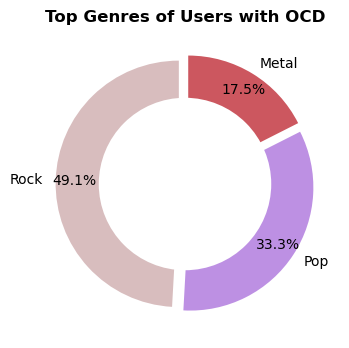

In [78]:
# Donut chart
colors = ("#D8BDBE", "#BD90E3", "#CC575F")

explode = [0.05, 0.05, 0.05]

plt.figure(figsize=(6, 4))

plt.pie(ocd_perc.values(), explode=explode, labels=ocd_perc.keys(), colors=colors, autopct="%1.1f%%", 
        shadow=False, startangle=90, pctdistance=0.85)

center_circle = plt.Circle((0, 0), 0.70, fc="white")
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title("Top Genres of Users with OCD", fontweight="bold", fontsize=12)
plt.axis=("equal")

plt.show

In [79]:
ocd_df["BPM"].value_counts()

BPM
120.0    6
140.0    5
150.0    4
107.0    3
110.0    3
174.0    3
145.0    3
121.0    2
112.0    2
130.0    2
0.0      2
90.0     2
105.0    2
135.0    2
96.0     2
162.0    2
101.0    2
91.0     2
134.0    2
155.0    1
108.0    1
149.0    1
103.0    1
137.0    1
128.0    1
220.0    1
141.0    1
160.0    1
136.0    1
178.0    1
119.0    1
159.0    1
66.0     1
102.0    1
171.0    1
84.0     1
156.0    1
115.0    1
60.0     1
85.0     1
109.0    1
97.0     1
87.0     1
180.0    1
80.0     1
125.0    1
81.0     1
86.0     1
104.0    1
114.0    1
117.0    1
95.0     1
Name: count, dtype: int64

# P